In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Load the Boston Housing Data Set from sklearn.datasets and print it
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston)

In [0]:
#Transform the data set into a data frame 
#NOTE: boston.data = the data we want, 
#      boston.feature_names = the column names of the data
#      boston.target = Our target variable or the price of the houses
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [0]:
#Get some statistics from our data set, count, mean standard deviation etc.
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


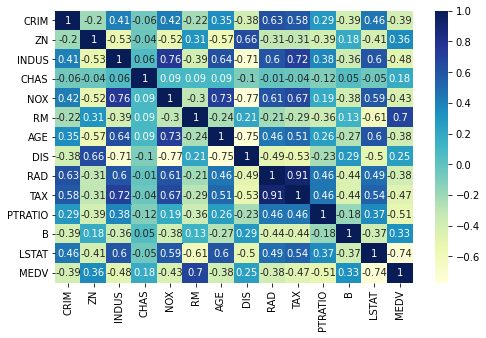

In [0]:
plt.rcParams['figure.figsize']=(8,5)
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
#

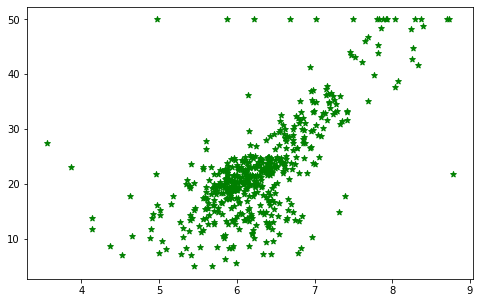

In [0]:
plt.scatter(df['RM'],df['MEDV'],color='green',marker='*')

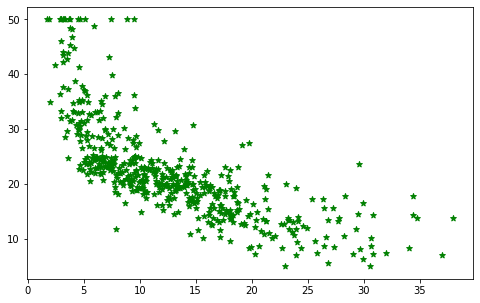

In [0]:
plt.scatter(df['LSTAT'],df['MEDV'],color='green',marker='*')

In [0]:
#Initialize the linear regression model
reg = linear_model.LinearRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
#Apply standard scaler
# from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#Train our model with the training data
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Print the coefecients/weights for each feature/column of our model
print(reg.coef_)

[[-0.10529668  0.09244614  0.04314078  0.09179696 -0.20238537  0.29910297
  -0.03820287 -0.32438914  0.21651549 -0.14528473 -0.22181716  0.11090741
  -0.41820062]]


In [0]:
#print our price predictions on our test data
y_pred = reg.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[[28.53469469]
 [36.6187006 ]
 [15.63751079]
 [25.5014496 ]
 [18.7096734 ]
 [23.16471591]
 [17.31011035]
 [14.07736367]
 [23.01064388]
 [20.54223482]
 [24.91632351]
 [18.41098052]
 [-6.52079687]
 [21.83372604]
 [19.14903064]
 [26.0587322 ]
 [20.30232625]
 [ 5.74943567]
 [40.33137811]
 [17.45791446]
 [27.47486665]
 [30.2170757 ]
 [10.80555625]
 [23.87721728]
 [17.99492211]
 [16.02608791]
 [23.268288  ]
 [14.36825207]
 [22.38116971]
 [19.3092068 ]
 [22.17284576]
 [25.05925441]
 [25.13780726]
 [18.46730198]
 [16.60405712]
 [17.46564046]
 [30.71367733]
 [20.05106788]
 [23.9897768 ]
 [24.94322408]
 [13.97945355]
 [31.64706967]
 [42.48057206]
 [17.70042814]
 [26.92507869]
 [17.15897719]
 [13.68918087]
 [26.14924245]
 [20.2782306 ]
 [29.99003492]
 [21.21260347]
 [34.03649185]
 [15.41837553]
 [25.95781061]
 [39.13897274]
 [22.96118424]
 [18.80310558]
 [33.07865362]
 [24.74384155]
 [12.83640958]
 [22.41963398]
 [30.64804979]
 [31.59567111]
 [16.34088197]
 [20.9504304 ]
 [16.70145875]
 [20.23215

In [0]:
#Print the the prediction for the third row of our test data actual price = 13.6
print(y_pred[0])
#print the actual price of houses from the testing data set
print(y_test[0])

[28.53469469]
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: 0, Length: 167, dtype: float64


In [0]:
# Ways to check model performance/accuracy using
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 3.148255754816832
MSE: 20.724023437339763
RMSE: 4.552364598463063
R2: 0.7261570836552476


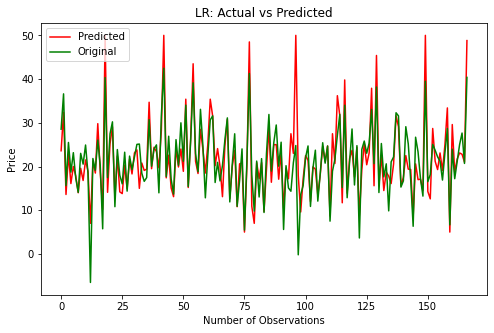

In [0]:
test = [t for t in range(len(y_test))]
labels={'Original','Predicted'}
plt.rcParams['figure.figsize']=(8,5)
plt.plot(test, y_test, color= 'red')
plt.plot(test, y_pred, color = 'green')
plt.title('LR: Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend(labels, loc='upper left')

Text(0, 0.5, 'Predicted')

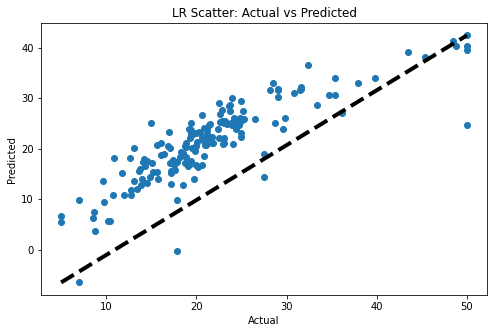

In [0]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
plt.title('LR Scatter: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

MLP Regressor

In [0]:
mlp = MLPRegressor(random_state=42, activation="relu", hidden_layer_sizes=(26))

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24.94767559 34.81571682 15.77921561 24.95816244 16.67194197 21.17068141
 17.5798394  13.60012941 24.53112719 20.77333385 22.11379654 20.84434174
  3.2118172  19.90274768 17.82897801 22.26957847 18.15284557 11.13104679
 44.88947158 15.3909201  27.42542057 28.49437611 14.42285716 23.60312783
 17.49458167 20.08727552 21.09679556 12.18000213 19.99351085 19.3099213
 19.41389595 25.07963017 17.90965796 23.61610737 17.11366609 17.02683406
 32.40701998 19.83846278 19.01773542 25.71133825 18.02227431 32.02871944
 47.47716528 17.51063838 26.119621   17.13269249 14.6796553  27.36029344
 20.6787908  28.40311488 20.71660688 34.49699758 15.86750612 25.42859187
 41.37142461 24.55251044 17.16426574 32.6651458  25.0301208  15.03588783
 25.38433408 32.91164729 30.80091664 17.44763225 23.15605027 21.10224597
 16.36616185 24.69306646 30.32244704 13.22290734 20.53302183 27.66607208
  8.2771197  19.01049835 21.52223596  3.66465175 19.83825455 45.6081636
 12.00163449 11.82475076 19.36581887 12.98742234 20.1

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


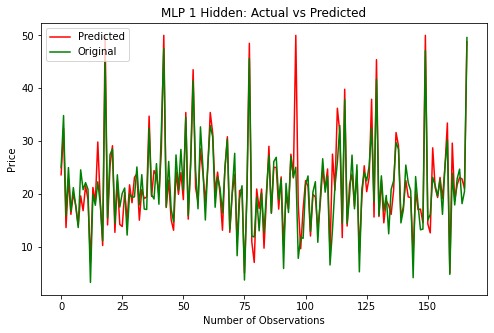

In [0]:
test = [t for t in range(len(y_test))]
labels={'Original','Predicted'}
plt.rcParams['figure.figsize']=(8,5)
plt.plot(test, y_test, color= 'red')
plt.plot(test, y_pred, color = 'green')
plt.title('MLP 1 Hidden: Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend(labels, loc='best')

Text(0, 0.5, 'Predicted')

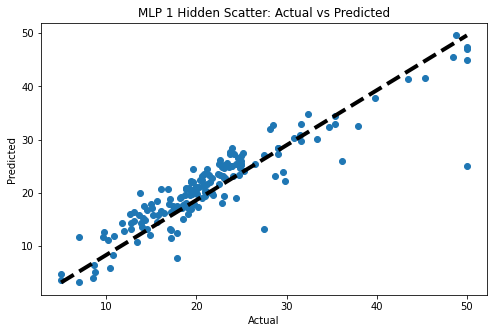

In [0]:
# fig, ax = plt.subplots()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
plt.title('MLP 1 Hidden Scatter: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [0]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mlp = MLPRegressor(random_state=42, activation="relu", hidden_layer_sizes=(20,26,10))

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26.98833563 34.582055   16.5428219  23.45432739 16.29753855 18.81098054
 18.55258091 12.76260414 23.38283478 18.45588574 18.68016722 19.75323237
  7.18648029 19.2818945  18.23571075 22.39300543 19.27484197  9.31814937
 45.9313448  14.28513102 25.10891612 27.79550138 12.656723   20.8936678
 16.06468983 20.78356562 19.76514438 13.19121477 19.18015094 18.94520477
 23.66808395 22.88984543 15.06321194 23.49646713 15.04230342 15.80088307
 33.34768936 18.47337319 22.151976   23.6446149  16.33157156 28.09391223
 49.3432359  18.78534572 26.02774651 17.94272093 15.94813381 24.99560824
 19.90340748 26.96589913 20.30699949 34.22792051 16.10690328 26.69219372
 45.60384547 22.8667473  16.37498403 33.38675965 23.74842776 17.14772772
 24.28977251 35.62438516 31.47467147 21.28428787 22.63912318 17.67515056
 15.58513567 23.86165107 30.04338998 13.16996079 19.80862029 25.90292104
 10.31398738 20.88522998 20.43379487  6.77483881 20.80020499 46.65075973
 11.94459449 13.60705659 19.43653347 13.32876417 19.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


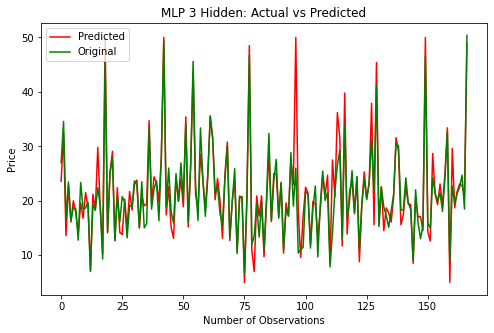

In [0]:
test = [t for t in range(len(y_test))]
labels={'Original','Predicted'}
plt.rcParams['figure.figsize']=(8,5)
plt.plot(test, y_test, color= 'red')
plt.plot(test, y_pred, color = 'green')
plt.title('MLP 3 Hidden: Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend(labels, loc='best')

Text(0, 0.5, 'Predicted')

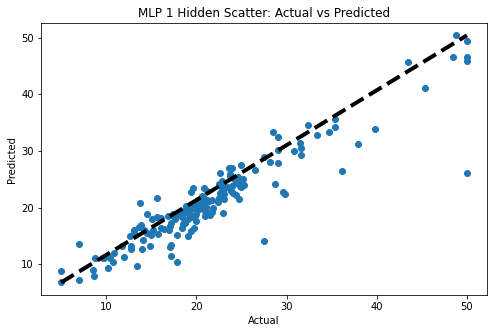

In [0]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
plt.title('MLP 1 Hidden Scatter: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [0]:
# MAE: 3.148255754816832
# MSE: 20.724023437339763
# RMSE: 4.552364598463063
# R2: 0.7261570836552476
# random_state=0, layer = 10
# MAE: 3.112646732782056
# MSE: 19.978727171810142
# RMSE: 4.469756947733304
# R2: 0.7360052728116908
# random_state=42, layer = 10
# MAE: 3.0037270221719115
# MSE: 21.618100622796806
# RMSE: 4.649526924623279
# R2: 0.7143429345039911
# random_state=0, layer = 20
# MAE: 2.705357696269497
# MSE: 16.681636629543696
# RMSE: 4.084315931651676
# R2: 0.7795723384578414
# random_state=42, layer = 20
# MAE: 2.5962236537416734
# MSE: 15.42761346234622
# RMSE: 3.927800079223257
# R2: 0.7961427386172286
# random_state=42, layer = 25
# MAE: 2.391986553482167
# MSE: 13.060561482378198
# RMSE: 3.6139398836143077
# R2: 0.8274204689910594
# random_state=42, layer = 26
# MAE: 2.3308725688124174
# MSE: 12.441292238838082
# RMSE: 3.5272216033073516
# R2: 0.8356033634066335
# random_state=42, layer = 27
# MAE: 2.550379204792034
# MSE: 14.858352227588963
# RMSE: 3.854653321323328
# R2: 0.8036648376516791
# random_state=42, layer = 28
# MAE: 2.491983133532293
# MSE: 13.357928726987247
# RMSE: 3.6548500279747795
# R2: 0.823491120342359
# random_state=42, layer = 29
# MAE: 2.3953626026001467
# MSE: 12.900934838388126
# RMSE: 3.591787137121036
# R2: 0.8295297421179082
# random_state=42, layer = 30
# MAE: 2.6072291750988694
# MSE: 15.238405720378058
# RMSE: 3.903640060299881
# R2: 0.7986428901931147
# predictedValues = sc_y.inverse_transform(predictedValues)
# print("MAE:", mean_absolute_error(y_test, predictedValues))
# print("MSE:", mean_squared_error(y_test, predictedValues))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, predictedValues)))
# print("R2:", r2_score(y_test, predictedValues))

MAE: 2.016680661290891
MSE: 10.837703297735283
RMSE: 3.292066721337112
R2: 0.8567928526762979
